# Premier League Data Analysis

Using datasets of the English Premier League, the analysis plots the league positions of each team from the 2007-2008 season to the 2016-2017 season. In addition, the wins, draws, and losses of the team for these seasons is plotted. The program uses a user input to display results for a certain team. 

pandas, matplotlib is used
the data comes from different csv files

Enter a Premier League Team: west ham
Please enter a valid team
Enter a Premier League Team: westham
Please enter a valid team
Enter a Premier League Team: aston villa
    Position #         Team  MP  Wins  Draws  Losses   F   A  D.1  Points  \
5            6  Aston Villa  38    16     12      10  71  51   20      60   
5            6  Aston Villa  38    17     11      10  54  48    6      62   
5            6  Aston Villa  38    17     13       8  52  39   13      64   
8            9  Aston Villa  38    12     12      14  48  59  -11      48   
15          16  Aston Villa  38     7     17      14  37  53  -16      38   
14          15  Aston Villa  38    10     11      17  47  69  -22      41   
14          15  Aston Villa  38    10      8      20  39  61  -22      38   
16          17  Aston Villa  38    10      8      20  31  57  -26      38   
19          20  Aston Villa  38     3      8      27  27  76  -49      17   

   Season Year  
5    2007-2008  
5    2008-2009  
5    2009-

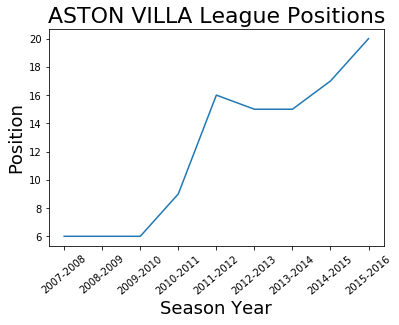

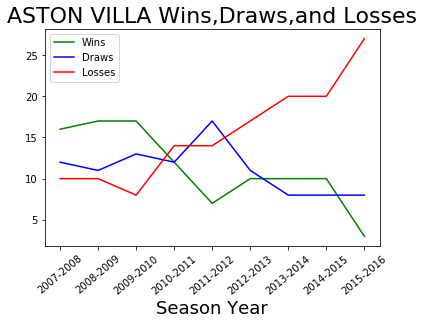

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


#read in all the data from 2007-2017 seasons
df_7_8 = pd.read_csv('english-premier-league-tables/epl20072008.csv')
df_8_9 = pd.read_csv('english-premier-league-tables/epl20082009.csv')
df_9_10 = pd.read_csv('english-premier-league-tables/epl20092010.csv')
df_10_11 = pd.read_csv('english-premier-league-tables/epl20102011.csv')
df_11_12 = pd.read_csv('english-premier-league-tables/epl20112012.csv')
df_12_13 = pd.read_csv('english-premier-league-tables/epl20122013.csv')
df_13_14 = pd.read_csv('english-premier-league-tables/epl20132014.csv')
df_14_15 = pd.read_csv('english-premier-league-tables/epl20142015.csv')
df_15_16 = pd.read_csv('english-premier-league-tables/epl20152016.csv')
df_16_17 = pd.read_csv('english-premier-league-tables/epl20162017.csv')

#add year column to each dataframe
df_7_8.insert(len(df_7_8.columns),"Season Year",value="2007-2008")
df_8_9.insert(len(df_8_9.columns),"Season Year",value="2008-2009")
df_9_10.insert(len(df_9_10.columns),"Season Year",value="2009-2010")
df_10_11.insert(len(df_10_11.columns),"Season Year",value="2010-2011")
df_11_12.insert(len(df_11_12.columns),"Season Year",value="2011-2012")
df_12_13.insert(len(df_12_13.columns),"Season Year",value="2012-2013")
df_13_14.insert(len(df_13_14.columns),"Season Year",value="2013-2014")
df_14_15.insert(len(df_14_15.columns),"Season Year",value="2014-2015")
df_15_16.insert(len(df_15_16.columns),"Season Year",value="2015-2016")
df_16_17.insert(len(df_16_17.columns),"Season Year",value="2016-2017")

#delete Nan Columns from each dataframe
#delete the columns that have all Nan values
df_7_8 = df_7_8.dropna(axis=1,how='any')
df_8_9 = df_8_9.dropna(axis=1,how='any')
df_9_10 = df_9_10.dropna(axis=1,how='any')
df_10_11 = df_10_11.dropna(axis=1,how='any')
df_11_12 = df_11_12.dropna(axis=1,how='any')
df_12_13 = df_12_13.dropna(axis=1,how='any')
df_13_14 = df_13_14.dropna(axis=1,how='any')
df_14_15 = df_14_15.dropna(axis=1,how='any')
df_15_16 = df_15_16.dropna(axis=1,how='any')
df_16_17 = df_16_17.dropna(axis=1,how='any')




#list of data frames of each season year
df_list = []

#append all the data frames to this list 
df_list.append(df_7_8)
df_list.append(df_8_9)
df_list.append(df_9_10)
df_list.append(df_10_11)
df_list.append(df_11_12)
df_list.append(df_12_13)
df_list.append(df_13_14)
df_list.append(df_14_15)
df_list.append(df_15_16)
df_list.append(df_16_17)

#concat all the data frames into one final data frame
df_final = pd.concat(df_list,sort=False)
#rename some column names for clarity purposes
df_final.rename(columns={'#' : 'Position #','W' : 'Wins', 'L':'Losses','D':'Draws','P':'Points'},inplace=True)

#user input
#keep asking for user input until they enter a valid team name
#team name is valid if location found in final dataframe
while True:
    team_name = input("Enter a Premier League Team: ")
    #find the location of the team and get only that teams data
    df_team = df_final.loc[df_final['Team'].str.lower() == team_name.lower()]
    
    #check if input is valid
    if df_team.empty:
        print("Please enter a valid team")
        continue
    else:
        break

print(df_team)



def plot_Pos(df):
    #plotting the data of the team
    #season (x-axis) and league position (y-axis) is plotted
    plt.plot(df_team['Season Year'],df_team['Position #'])


    plt.title(team_name.upper() + " " + "League Positions",fontsize=22)
    plt.xlabel("Season Year",fontsize=18)
    plt.ylabel("Position",fontsize=18)

    #rotate x-axis label to make it easier to see 
    plt.tick_params(axis='x',labelrotation=40)
    plt.show()

def plot_WDL(df):
    #plot of wins, losses, and draws over all the seasons
    plt.plot(df_team['Season Year'],df_team['Wins'],'g')
    plt.plot(df_team['Season Year'],df_team['Draws'],'b')
    plt.plot(df_team['Season Year'],df_team['Losses'],'r')


    plt.title(team_name.upper() + " " + "Wins,Draws,and Losses",fontsize=22)
    plt.xlabel("Season Year",fontsize=18)
    plt.legend()


    #rotate x-axis label to make it easier to see 
    plt.tick_params(axis='x',labelrotation=40)
    plt.show()

    
plot_Pos(df_team)
plot_WDL(df_team)
